# Tarea 1 | Aprendizaje Estadístico y Computación | Magíster en Ciencias de Datos

---
## Caso 1: Regresión lineal con dataset 'Ozone'

In [47]:
! pip3 install faraway


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


### Cargamos el dataset

In [571]:
from faraway.datasets import ozone, prostate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.metrics import (mean_squared_error, 
    r2_score, accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, confusion_matrix
)
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.tools import eval_measures
import seaborn as sns

In [452]:
ozone_df = ozone.load()
ozone_df

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,33
1,5,5700,3,37,45,590,-24,128,100,34
2,5,5760,3,51,54,1450,25,139,60,35
3,6,5720,4,69,35,1568,15,121,60,36
4,4,5790,6,19,45,2631,-33,123,100,37
...,...,...,...,...,...,...,...,...,...,...
325,8,5630,4,50,50,2851,-5,100,70,384
326,2,5730,3,53,51,111,-14,225,200,387
327,3,5690,3,23,51,5000,-36,107,70,388
328,5,5650,3,61,50,3704,18,83,40,389


In [453]:
# Separamos las variables predictoras y el target
cols_predictors = ['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis', 'doy']
target = 'O3'

# Separamos en el dataframe X e y
X_ozone = ozone_df[cols_predictors]
y_ozone = ozone_df[target]

In [454]:
X_ozone.head()

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,5710,4,28,40,2693,-25,87,250,33
1,5700,3,37,45,590,-24,128,100,34
2,5760,3,51,54,1450,25,139,60,35
3,5720,4,69,35,1568,15,121,60,36
4,5790,6,19,45,2631,-33,123,100,37


In [455]:
y_ozone.head()

0    3
1    5
2    5
3    6
4    4
Name: O3, dtype: int64

### 1. Obtenemos nuestro dataset de entrenamiento y de test en proporción 80:20

In [456]:
# Seteamos la proporción 80:20 y un random_state para obtener siempre los mismos resultados
X_train_ozone, X_test_ozone, y_train_ozone, y_test_ozone = train_test_split(X_ozone, y_ozone, test_size=0.2, random_state=1)
df_train_ozone = pd.concat([X_train_ozone, y_train_ozone], axis=1)

In [457]:
X_train_ozone = X_train_ozone.reset_index().drop('index', axis=1)
X_test_ozone = X_test_ozone.reset_index().drop('index', axis=1)
y_train_ozone = y_train_ozone.reset_index().drop('index', axis=1)
y_test_ozone = y_test_ozone.reset_index().drop('index', axis=1)

### 2. Análisis descriptivo de las variables de entrenamiento

Tenemos que todas nuestras variables son numéricas. Procedemos a mirar estadísticos relevantes por medio de un boxplot

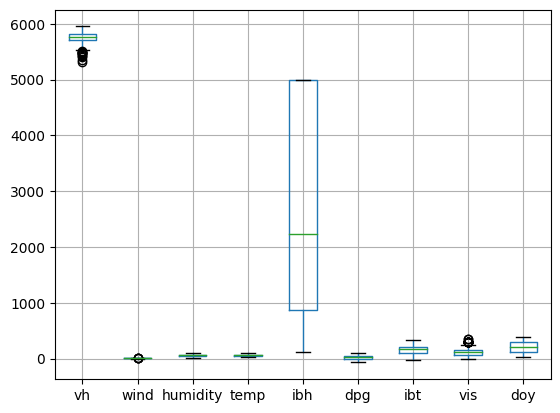

In [458]:
X_train_ozone.boxplot()
plt.show()

Dado que las variables tienen rangos de muy diferentes entre sí, procedemos a normalizarlas para poder analizar su distribución de una forma visualmente más simple.

In [459]:
scaler_ozone = StandardScaler()
X_train_ozone_scaled = pd.DataFrame(scaler_ozone.fit_transform(X_train_ozone), columns=X_train_ozone.columns)

#### Boxplots con variables normalizadas

In [460]:
X_train_ozone

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,5890,4,71,84,836,28,275,80,235
1,5780,5,76,63,875,-15,205,0,354
2,5860,4,33,81,629,-11,302,140,203
3,5900,6,86,87,990,22,295,40,216
4,5770,5,64,65,770,26,242,120,202
...,...,...,...,...,...,...,...,...,...
259,5780,7,65,59,3930,68,151,150,254
260,5850,3,73,78,377,-3,260,200,310
261,5680,4,57,35,721,28,130,140,109
262,5830,5,71,71,2716,26,176,140,288


In [461]:
X_train_ozone_scaled

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,1.292953,-0.406596,0.660203,1.561647,-0.973535,0.310201,1.491401,-0.566393,0.255807
1,0.266789,0.052128,0.912875,0.111677,-0.951933,-0.873464,0.576388,-1.550777,1.393792
2,1.013090,-0.406596,-1.260109,1.354509,-1.088193,-0.763356,1.844334,0.171894,-0.050205
3,1.386240,0.510851,1.418221,1.768786,-0.888234,0.145039,1.752833,-1.058585,0.074112
4,0.173501,0.052128,0.306461,0.249769,-1.010093,0.255147,1.060038,-0.074202,-0.059768
...,...,...,...,...,...,...,...,...,...
259,0.266789,0.969574,0.356996,-0.164508,0.740245,1.411285,-0.129478,0.294942,0.437502
260,0.919802,-0.865319,0.761272,1.147370,-1.227777,-0.543139,1.295327,0.910182,0.973025
261,-0.666088,-0.406596,-0.047280,-1.821617,-1.037234,0.310201,-0.403982,0.171894,-0.949117
262,0.733227,0.052128,0.660203,0.664047,0.067805,0.255147,0.197312,0.171894,0.762641


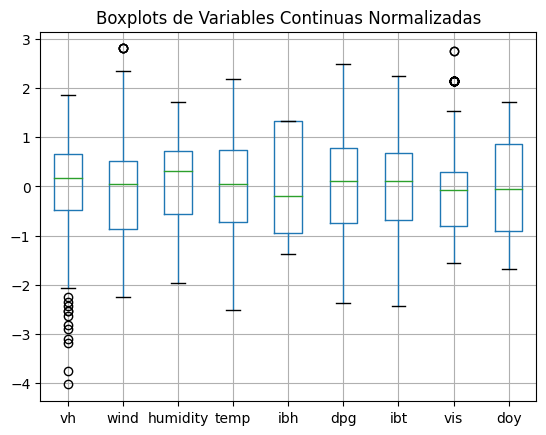

In [462]:
X_train_ozone_scaled.boxplot()
plt.title('Boxplots de Variables Continuas Normalizadas')
plt.show()

#### Describimos numéricamente las variables

In [463]:
df_train_ozone.describe()

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,O3
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,5751.401515,4.886364,57.935606,61.382576,2593.587121,16.731061,160.905303,126.030303,208.250000,11.617424
std,107.398930,2.184103,19.826041,14.510565,1808.794902,36.396836,76.647002,81.423499,104.769446,8.010535
min,5320.000000,0.000000,19.000000,25.000000,111.000000,-69.000000,-25.000000,0.000000,33.000000,1.000000
25%,5700.000000,3.000000,46.750000,51.000000,873.500000,-10.000000,108.750000,60.000000,114.500000,5.000000
50%,5770.000000,5.000000,64.000000,62.000000,2230.500000,21.000000,169.500000,120.000000,202.500000,10.000000
75%,5822.500000,6.000000,72.250000,72.000000,5000.000000,45.000000,213.000000,150.000000,298.500000,16.250000
max,5950.000000,11.000000,92.000000,93.000000,5000.000000,107.000000,332.000000,350.000000,387.000000,38.000000


Podemos ver que la variable *ibh* tiene un rango intercuartil mayor que las demás, sin embargo, si vemos sus valores máximos y mínimos, estos están mucho más cercanos a la media de los datos. También podemos decir que la distribución de estos datos se puede ver como una curva más delgada y condensada que otros.

Obtenemos las correlaciones de cada predictor con el target, ordenadamente.

In [464]:
df_train_ozone.corr().sort_values(target, ascending=False)[target]

O3          1.000000
temp        0.768541
ibt         0.749822
vh          0.598553
humidity    0.441895
dpg         0.180019
doy         0.072281
wind       -0.028573
vis        -0.447870
ibh        -0.586710
Name: O3, dtype: float64

#### Variables más correlacionadas (más cercanas a 1 en valor absoluto):

1. **temp**
2. **ibt**
3. **vh**
4. **ibh**
5. **vis**
6. **humidity**
7. **dpg**
8. **doy**
9. **wind**

##### Scatter plot de predictores vs target

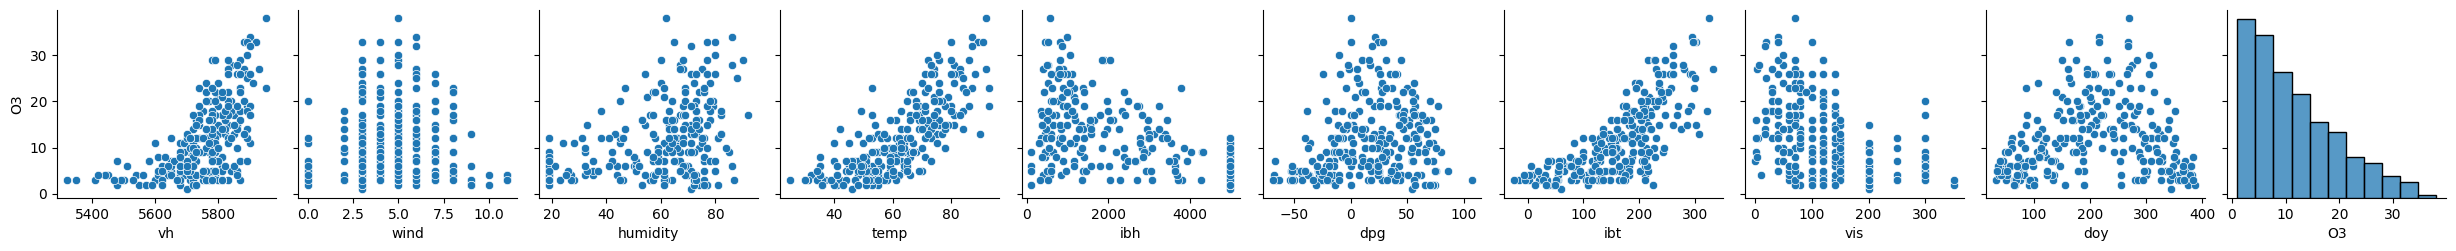

In [465]:
sns.pairplot(data=df_train_ozone, y_vars='O3')
plt.show()

Graficamos la dispersión de las variables con respecto al target. Se puede reflejar claramente en el gráfico que la variable *temp* e *ibt* tienen correlacion con *O3* mayores. La curva se puede ver más similar a un polinomio de grado 2. Similar es el caso de la variable *vh*.

Con respecto a la variable *doy* y *wind*, no se logra identificar una tendencia lineal clara.

### 3. Determinar modelo lineal con mejor desempeño

Una vez analizamos descriptivamente las variables, valdría la pena probar diferentes combinaciones lineales de estas, generando diferentes regresiones y evaluar el modelo con mejores métricas de desempeño. Para lo anterior, podemos utilizar el método *backward elimination*, en el cual, mediante el test F, vamos descartando variables según su valor p más alto.

#### Generamos variables cuadráticas de las variables

In [466]:
# Funcion que genera polinomios de la variable
def dataset_to_polinomial_n(df, columns_to_scale, n):
    for pred in columns_to_scale:
        df[f'{pred}^{n}'] = df[pred] ** n
    return df

In [467]:
# Dataset de entrenamiento original
columns_to_scale = X_train_ozone_scaled.columns.tolist()
X_train_ozone_scaled

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,1.292953,-0.406596,0.660203,1.561647,-0.973535,0.310201,1.491401,-0.566393,0.255807
1,0.266789,0.052128,0.912875,0.111677,-0.951933,-0.873464,0.576388,-1.550777,1.393792
2,1.013090,-0.406596,-1.260109,1.354509,-1.088193,-0.763356,1.844334,0.171894,-0.050205
3,1.386240,0.510851,1.418221,1.768786,-0.888234,0.145039,1.752833,-1.058585,0.074112
4,0.173501,0.052128,0.306461,0.249769,-1.010093,0.255147,1.060038,-0.074202,-0.059768
...,...,...,...,...,...,...,...,...,...
259,0.266789,0.969574,0.356996,-0.164508,0.740245,1.411285,-0.129478,0.294942,0.437502
260,0.919802,-0.865319,0.761272,1.147370,-1.227777,-0.543139,1.295327,0.910182,0.973025
261,-0.666088,-0.406596,-0.047280,-1.821617,-1.037234,0.310201,-0.403982,0.171894,-0.949117
262,0.733227,0.052128,0.660203,0.664047,0.067805,0.255147,0.197312,0.171894,0.762641


In [468]:
X_train_ozone_scaled_v2 = dataset_to_polinomial_n(X_train_ozone_scaled.copy(), columns_to_scale, 2)
X_train_ozone_scaled_v2

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,vh^2,wind^2,humidity^2,temp^2,ibh^2,dpg^2,ibt^2,vis^2,doy^2
0,1.292953,-0.406596,0.660203,1.561647,-0.973535,0.310201,1.491401,-0.566393,0.255807,1.671727,0.165320,0.435868,2.438742,0.947771,0.096225,2.224276,0.320801,0.065437
1,0.266789,0.052128,0.912875,0.111677,-0.951933,-0.873464,0.576388,-1.550777,1.393792,0.071176,0.002717,0.833341,0.012472,0.906176,0.762939,0.332224,2.404909,1.942656
2,1.013090,-0.406596,-1.260109,1.354509,-1.088193,-0.763356,1.844334,0.171894,-0.050205,1.026351,0.165320,1.587874,1.834693,1.184165,0.582712,3.401568,0.029548,0.002521
3,1.386240,0.510851,1.418221,1.768786,-0.888234,0.145039,1.752833,-1.058585,0.074112,1.921662,0.260969,2.011349,3.128603,0.788959,0.021036,3.072423,1.120602,0.005493
4,0.173501,0.052128,0.306461,0.249769,-1.010093,0.255147,1.060038,-0.074202,-0.059768,0.030103,0.002717,0.093918,0.062385,1.020287,0.065100,1.123680,0.005506,0.003572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.266789,0.969574,0.356996,-0.164508,0.740245,1.411285,-0.129478,0.294942,0.437502,0.071176,0.940075,0.127446,0.027063,0.547962,1.991726,0.016765,0.086991,0.191408
260,0.919802,-0.865319,0.761272,1.147370,-1.227777,-0.543139,1.295327,0.910182,0.973025,0.846036,0.748777,0.579535,1.316458,1.507437,0.295000,1.677871,0.828431,0.946777
261,-0.666088,-0.406596,-0.047280,-1.821617,-1.037234,0.310201,-0.403982,0.171894,-0.949117,0.443673,0.165320,0.002235,3.318287,1.075855,0.096225,0.163201,0.029548,0.900824
262,0.733227,0.052128,0.660203,0.664047,0.067805,0.255147,0.197312,0.171894,0.762641,0.537621,0.002717,0.435868,0.440958,0.004598,0.065100,0.038932,0.029548,0.581621


#### Variables cúbicas

In [469]:
X_train_ozone_scaled_v3 = dataset_to_polinomial_n(X_train_ozone_scaled_v2.copy(), columns_to_scale, 3)
X_train_ozone_scaled_v3

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,vh^2,...,doy^2,vh^3,wind^3,humidity^3,temp^3,ibh^3,dpg^3,ibt^3,vis^3,doy^3
0,1.292953,-0.406596,0.660203,1.561647,-0.973535,0.310201,1.491401,-0.566393,0.255807,1.671727,...,0.065437,2.161463,-0.067218,0.287761,3.808454,-0.922688,0.029849,3.317288,-0.181700,0.016739
1,0.266789,0.052128,0.912875,0.111677,-0.951933,-0.873464,0.576388,-1.550777,1.393792,0.071176,...,1.942656,0.018989,0.000142,0.760737,0.001393,-0.862619,-0.666400,0.191490,-3.729477,2.707659
2,1.013090,-0.406596,-1.260109,1.354509,-1.088193,-0.763356,1.844334,0.171894,-0.050205,1.026351,...,0.002521,1.039785,-0.067218,-2.000894,2.485108,-1.288600,-0.444816,6.273629,0.005079,-0.000127
3,1.386240,0.510851,1.418221,1.768786,-0.888234,0.145039,1.752833,-1.058585,0.074112,1.921662,...,0.005493,2.663885,0.133316,2.852537,5.533828,-0.700780,0.003051,5.385445,-1.186253,0.000407
4,0.173501,0.052128,0.306461,0.249769,-1.010093,0.255147,1.060038,-0.074202,-0.059768,0.030103,...,0.003572,0.005223,0.000142,0.028782,0.015582,-1.030585,0.016610,1.191144,-0.000409,-0.000214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.266789,0.969574,0.356996,-0.164508,0.740245,1.411285,-0.129478,0.294942,0.437502,0.071176,...,0.191408,0.018989,0.911472,0.045498,-0.004452,0.405626,2.810893,-0.002171,0.025657,0.083742
260,0.919802,-0.865319,0.761272,1.147370,-1.227777,-0.543139,1.295327,0.910182,0.973025,0.846036,...,0.946777,0.778185,-0.647931,0.441184,1.510464,-1.850797,-0.160226,2.173392,0.754023,0.921237
261,-0.666088,-0.406596,-0.047280,-1.821617,-1.037234,0.310201,-0.403982,0.171894,-0.949117,0.443673,...,0.900824,-0.295525,-0.067218,-0.000106,-6.044646,-1.115913,0.029849,-0.065930,0.005079,-0.854988
262,0.733227,0.052128,0.660203,0.664047,0.067805,0.255147,0.197312,0.171894,0.762641,0.537621,...,0.581621,0.394198,0.000142,0.287761,0.292817,0.000312,0.016610,0.007682,0.005079,0.443568


Nos quedamos con un total de 27 features

In [470]:
columns_X_train = X_train_ozone_scaled_v3.columns.tolist()
columns_X_train

['vh',
 'wind',
 'humidity',
 'temp',
 'ibh',
 'dpg',
 'ibt',
 'vis',
 'doy',
 'vh^2',
 'wind^2',
 'humidity^2',
 'temp^2',
 'ibh^2',
 'dpg^2',
 'ibt^2',
 'vis^2',
 'doy^2',
 'vh^3',
 'wind^3',
 'humidity^3',
 'temp^3',
 'ibh^3',
 'dpg^3',
 'ibt^3',
 'vis^3',
 'doy^3']

#### Utilizamos backward elimination para considerar las variables más relevantes

##### Scikit learn implementation

In [471]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()

# Create the RFE object and specify the number of
selector = RFE(estimator, n_features_to_select=21)

# Fit the RFE object to the data
selector = selector.fit(X_train_ozone_scaled_v3, y_train_ozone)

# Print the selected features
selected_vars_ozone_v1 = list(X_train_ozone_scaled_v3.columns[selector.support_])

**Columnas a seleccionar según algoritmo scikit learn**

In [472]:
selected_vars_ozone_v1

['vh',
 'wind',
 'humidity',
 'temp',
 'ibh',
 'dpg',
 'ibt',
 'vis',
 'doy',
 'humidity^2',
 'temp^2',
 'ibh^2',
 'dpg^2',
 'ibt^2',
 'doy^2',
 'humidity^3',
 'temp^3',
 'ibh^3',
 'ibt^3',
 'vis^3',
 'doy^3']

##### Implementación profesor

In [473]:
def backwards_elimination(X_train, y_train, columns_decoder):
    col_indexes_to_remove = list()

    num_vars = X_train.shape[1]
    for i in range(num_vars, 0, -1):
        # Fit model with i variables
        model = LinearRegression()
        model.fit(X_train[:, :i], y_train)

        # Check p-values of the model
        p_values = f_regression(X_train, y_train)[1]
        max_p_value = np.max(p_values)

        # If the maximum p-value is greater than the threshold, remove the variable
        # with the highest p-value
        if max_p_value > 0.05:
            var_to_remove = np.argmax(p_values)
            col_indexes_to_remove.append(var_to_remove)
            X_train = np.delete(X_train, var_to_remove, 1)
    

    return [columns_decoder[i] for i in col_indexes_to_remove]

In [474]:
X_train_ozone_scaled_v3.head()

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,vh^2,...,doy^2,vh^3,wind^3,humidity^3,temp^3,ibh^3,dpg^3,ibt^3,vis^3,doy^3
0,1.292953,-0.406596,0.660203,1.561647,-0.973535,0.310201,1.491401,-0.566393,0.255807,1.671727,...,0.065437,2.161463,-0.067218,0.287761,3.808454,-0.922688,0.029849,3.317288,-0.181700,0.016739
1,0.266789,0.052128,0.912875,0.111677,-0.951933,-0.873464,0.576388,-1.550777,1.393792,0.071176,...,1.942656,0.018989,0.000142,0.760737,0.001393,-0.862619,-0.666400,0.191490,-3.729477,2.707659
2,1.013090,-0.406596,-1.260109,1.354509,-1.088193,-0.763356,1.844334,0.171894,-0.050205,1.026351,...,0.002521,1.039785,-0.067218,-2.000894,2.485108,-1.288600,-0.444816,6.273629,0.005079,-0.000127
3,1.386240,0.510851,1.418221,1.768786,-0.888234,0.145039,1.752833,-1.058585,0.074112,1.921662,...,0.005493,2.663885,0.133316,2.852537,5.533828,-0.700780,0.003051,5.385445,-1.186253,0.000407
4,0.173501,0.052128,0.306461,0.249769,-1.010093,0.255147,1.060038,-0.074202,-0.059768,0.030103,...,0.003572,0.005223,0.000142,0.028782,0.015582,-1.030585,0.016610,1.191144,-0.000409,-0.000214


In [475]:
column_decoder = dict(zip(range(len(columns_X_train)), columns_X_train))
columns_to_delete = backwards_elimination(X_train_ozone_scaled_v3.values, y_train_ozone.values, column_decoder)
selected_vars_ozone_v2 = list(set(columns_X_train) - set(columns_to_delete))

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

**Columnas a seleccionar según algoritmo clases**

In [476]:
selected_vars_ozone_v2

['vis^2',
 'wind^2',
 'vh',
 'humidity^2',
 'ibh',
 'doy^2',
 'humidity^3',
 'humidity',
 'temp^3',
 'vis^3',
 'vh^2',
 'temp^2',
 'doy',
 'ibh^3',
 'wind^3',
 'ibt^3',
 'temp',
 'ibt',
 'dpg^2',
 'dpg',
 'dpg^3',
 'ibt^2']

#### Generamos combinaciones de variables y evaluamos diferentes modelos

In [477]:
columns_third_degree = set([col for col in selected_vars_ozone_v1 + selected_vars_ozone_v1 if '^3' in col])
columns_second_degree = set([col for col in selected_vars_ozone_v1 + selected_vars_ozone_v1 if '^2' in col])
columns_first_degree = set([col for col in selected_vars_ozone_v1 + selected_vars_ozone_v1 if col not in columns_second_degree | columns_third_degree])

In [478]:
var_combinations = {
    'linear': list(columns_first_degree),
    'quadratic': list(columns_second_degree),
    'cubic': list(columns_third_degree),
    'all_selected': list(columns_first_degree | columns_second_degree | columns_third_degree),
    'selected_v1': selected_vars_ozone_v1,
    'selected_v2': selected_vars_ozone_v2,
    'linear_quadratic': list(columns_first_degree | columns_second_degree),
    'linear_cubic': list(columns_first_degree | columns_third_degree),
    'quadratic_cubic': list(columns_second_degree | columns_third_degree),
    'all': columns_X_train
}
var_combinations

{'linear': ['wind',
  'vh',
  'temp',
  'ibt',
  'ibh',
  'dpg',
  'humidity',
  'vis',
  'doy'],
 'quadratic': ['ibh^2', 'humidity^2', 'dpg^2', 'doy^2', 'ibt^2', 'temp^2'],
 'cubic': ['ibh^3', 'ibt^3', 'humidity^3', 'temp^3', 'doy^3', 'vis^3'],
 'all_selected': ['wind',
  'ibh^2',
  'vh',
  'humidity^2',
  'ibh',
  'doy^2',
  'humidity^3',
  'humidity',
  'temp^3',
  'vis^3',
  'temp^2',
  'doy',
  'ibh^3',
  'ibt^3',
  'temp',
  'ibt',
  'dpg^2',
  'dpg',
  'ibt^2',
  'doy^3',
  'vis'],
 'selected_v1': ['vh',
  'wind',
  'humidity',
  'temp',
  'ibh',
  'dpg',
  'ibt',
  'vis',
  'doy',
  'humidity^2',
  'temp^2',
  'ibh^2',
  'dpg^2',
  'ibt^2',
  'doy^2',
  'humidity^3',
  'temp^3',
  'ibh^3',
  'ibt^3',
  'vis^3',
  'doy^3'],
 'selected_v2': ['vis^2',
  'wind^2',
  'vh',
  'humidity^2',
  'ibh',
  'doy^2',
  'humidity^3',
  'humidity',
  'temp^3',
  'vis^3',
  'vh^2',
  'temp^2',
  'doy',
  'ibh^3',
  'wind^3',
  'ibt^3',
  'temp',
  'ibt',
  'dpg^2',
  'dpg',
  'dpg^3',
  'ibt^2'

##### Definimos una función para crear la regresión

In [479]:
def fitted_linear_reg(x, y):
    X = sm.add_constant(x)
    regr = sm.OLS(y, X)
    results = regr.fit()
    return results

def train_regressions(X_train, y_train, vars):
    models = dict()
    for name, columns in vars.items():
        print(y_train)
        linreg_fitted = fitted_linear_reg(X_train[columns], y_train)
        models[name] = linreg_fitted

    return models


    

##### Entrenamos nuestros modelos

In [480]:
models = train_regressions(X_train_ozone_scaled_v3, y_train_ozone, var_combinations)
models

     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34


{'linear': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a9415c10>,
 'quadratic': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2acc5c250>,
 'cubic': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2acce1c10>,
 'all_selected': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2acd5fd50>,
 'selected_v1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a9712b90>,
 'selected_v2': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2acd7d990>,
 'linear_quadratic': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2acd75850>,
 'linear_cubic': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2acd77750>,
 'quadratic_cubic': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2acd83150>,
 'all': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2acd83d90>}

##### Evaluamos cada modelo por su R^2, RMSE y test F (valor p)

In [481]:
def get_metrics_from_model(model, X_train, y_train):
    metrics = dict()
    metrics['R2'] = model.rsquared
    metrics['F_pvalue'] = model.f_pvalue
    y_pred = model.predict(sm.add_constant(X_train))
    metrics['RMSE'] = eval_measures.rmse(y_train.squeeze(), y_pred)
    return metrics

In [482]:
model_metrics = list()
for model_name, obj in models.items():
    X_model = X_train_ozone_scaled_v3[var_combinations[model_name]]
    metrics = get_metrics_from_model(obj, X_model, y_train_ozone)
    metrics['Model'] = f'Model {model_name}'
    model_metrics.append(metrics)

##### Generamos un dataframe con las métricas del modelo

In [483]:
models_metrics_df = pd.DataFrame(model_metrics)
models_metrics_df

,R2,F_pvalue,RMSE,Model
0,0.692949,4.445012e-60,4.430401,Model linear
1,0.444302,2.769664e-30,5.960148,Model quadratic
2,0.543812,4.011897e-41,5.400193,Model cubic
3,0.805889,7.557885e-74,3.522597,Model all_selected
4,0.805889,7.557885e-74,3.522597,Model selected_v1
5,0.776335,9.557036e-66,3.781261,Model selected_v2
6,0.782893,3.032299e-73,3.725410,Model linear_quadratic
7,0.732115,4.097392e-62,4.138198,Model linear_cubic
8,0.688256,1.359502e-56,4.464124,Model quadratic_cubic
9,0.808366,1.421829e-69,3.500044,Model all


Vemos que todos los modelos tienen un valor p muy bajo, por lo que se prefiere cualquiera de estos al modelo base, con significancia estadística. Ordenamos por R^2 y RMSE para elegir el mejor modelo.

In [484]:
models_metrics_df.sort_values('R2', ascending=False)

,R2,F_pvalue,RMSE,Model
9,0.808366,1.421829e-69,3.500044,Model all
3,0.805889,7.557885e-74,3.522597,Model all_selected
4,0.805889,7.557885e-74,3.522597,Model selected_v1
6,0.782893,3.032299e-73,3.725410,Model linear_quadratic
5,0.776335,9.557036e-66,3.781261,Model selected_v2
7,0.732115,4.097392e-62,4.138198,Model linear_cubic
0,0.692949,4.445012e-60,4.430401,Model linear
8,0.688256,1.359502e-56,4.464124,Model quadratic_cubic
2,0.543812,4.011897e-41,5.400193,Model cubic
1,0.444302,2.769664e-30,5.960148,Model quadratic


Tenemos que el mejor modelo es el que utiliza todas las variables, `Model all`, aunque por parsimonia y por mejor interpretabilidad, preferimos utilizar el modelo `Model selected_v1`, dado que tienen un R2 y RMSE similar al mejor modelo, y menos variables.

In [485]:
selected_model = 'selected_v1'

In [486]:
print(models[selected_model].summary())

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     47.84
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           7.56e-74
Time:                        09:51:47   Log-Likelihood:                -707.03
No. Observations:                 264   AIC:                             1458.
Df Residuals:                     242   BIC:                             1537.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7720      0.806     18.336      0.0

### 4. Significancia del modelo seleccionado

#### a. ¿Es el modelo significativo?

El modelo sí es significativo. Su valor p, dado el test de Fisher es de 7.56e-74, el cual es un valor muy bajo y menor a 0.05. Con lo anterior, podemos agregar entonces que se rechaza la hipótesis de mantener el modelo nulo, en contraposición con el modelo propuesto.

#### b. ¿Existe alguna covariable no significativa? 

Sí existen. En particular, las variables `ibh`, `ibt`, `humidity^2`, `ibh^2`, `ibt^2`, `humidity^3`, `temp^3`, `ibh^3` y `ibt^3`  tienen un valor p por sobre el umbral de 0.05.

#### c. ¿En caso de existir alguna covariable no significativa, la quitaría del modelo? Fundamente.

Se puede probar quitando las variables, ajustando una nueva regresión y observar los estadísticos. Lo hacemos a continuación.

In [487]:
var_combinations[selected_model]

['vh',
 'wind',
 'humidity',
 'temp',
 'ibh',
 'dpg',
 'ibt',
 'vis',
 'doy',
 'humidity^2',
 'temp^2',
 'ibh^2',
 'dpg^2',
 'ibt^2',
 'doy^2',
 'humidity^3',
 'temp^3',
 'ibh^3',
 'ibt^3',
 'vis^3',
 'doy^3']

In [488]:
new_model_vars = list(set(var_combinations[selected_model]) - set(['ibh', 'ibt', 'humidity^2', 'ibh^2', 'ibt^2', 'humidity^3', 'temp^3', 'ibh^3', 'ibt^3']))
new_model_vars

['wind',
 'vh',
 'temp',
 'dpg^2',
 'dpg',
 'doy^2',
 'doy',
 'humidity',
 'doy^3',
 'vis^3',
 'vis',
 'temp^2']

In [489]:
var_combinations['new_model'] = new_model_vars

#### Ejecutamos la regresión y miramos los estadísticos del nuevo modelo

In [490]:
linreg_fitted_new_model = fitted_linear_reg(X_train_ozone_scaled_v3[new_model_vars], y_train_ozone)
models['new_model'] = linreg_fitted_new_model

In [491]:
print(linreg_fitted_new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     79.65
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           2.39e-78
Time:                        09:51:58   Log-Likelihood:                -716.15
No. Observations:                 264   AIC:                             1458.
Df Residuals:                     251   BIC:                             1505.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4802      0.665     21.790      0.0

Vemos que el valor de R2 es cercano al valor obtenido en el modelo anterior, sin embargo ahora con menos variables, lo que es un mejor indicador. Asimismo, cada variable de este nuevo modelo es significativa estadísticamente (valor p menor a 0.05). En conclusión, las covariables seleccionadas pueden ser una buena alternativa a ser eliminadas del modelo seleccionado original.

### 5. Significancia del modelo seleccionado

Predecimos la variable `O2` con los datos de test. Para lo anterior, primero debemos estandarizar los datos de entrenamiento, dado que nuestro modelo fue entrenado con datos estandarizados.

In [492]:
X_test_ozone_scaled = pd.DataFrame(scaler_ozone.transform(X_test_ozone), columns=X_test_ozone.columns.tolist())
X_test_ozone_scaled

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,-1.412389,-0.865319,-1.866523,-1.131155,1.332923,-0.515612,-1.593498,0.171894,-1.073435
1,-0.572800,0.510851,0.811806,-0.371646,1.332923,-0.102705,-0.874560,-0.566393,1.087779
2,0.733227,-0.865319,0.255927,1.216416,-0.148218,1.301177,0.746319,-0.689441,0.131490
3,1.199665,-0.406596,1.013944,1.561647,-0.979074,0.282674,1.334542,-0.566393,0.265370
4,-0.852663,-0.865319,-0.198884,-0.785924,1.332923,0.282674,-1.188278,2.140661,1.288600
...,...,...,...,...,...,...,...,...,...
61,-0.945951,-0.865319,0.154858,-0.785924,0.615063,0.034930,-1.018347,-1.058585,1.728493
62,-0.386225,0.510851,0.356996,-0.371646,1.332923,0.502891,-0.952989,0.910182,0.896522
63,-0.572800,1.887021,0.205392,0.042631,0.623925,1.576448,-0.730772,-0.074202,-0.327529
64,-1.132526,-0.406596,-0.704229,-1.545432,-0.715416,0.640526,-0.600056,0.294942,-0.863051


##### Generamos las columnas extras necesarias en el dataframe de test

In [493]:
X_test_ozone_scaled['humidity^2'] = X_test_ozone_scaled['humidity'] ** 2
X_test_ozone_scaled['temp^2'] = X_test_ozone_scaled['temp'] ** 2
X_test_ozone_scaled['ibh^2'] = X_test_ozone_scaled['ibh'] ** 2
X_test_ozone_scaled['dpg^2'] = X_test_ozone_scaled['dpg'] ** 2
X_test_ozone_scaled['ibt^2'] = X_test_ozone_scaled['ibt'] ** 2
X_test_ozone_scaled['doy^2'] = X_test_ozone_scaled['doy'] ** 2
X_test_ozone_scaled['humidity^3'] = X_test_ozone_scaled['humidity'] ** 3
X_test_ozone_scaled['temp^3'] = X_test_ozone_scaled['temp'] ** 3
X_test_ozone_scaled['ibh^3'] = X_test_ozone_scaled['ibh'] ** 3
X_test_ozone_scaled['ibt^3'] = X_test_ozone_scaled['ibt'] ** 3
X_test_ozone_scaled['vis^3'] = X_test_ozone_scaled['vis'] ** 3
X_test_ozone_scaled['doy^3'] = X_test_ozone_scaled['doy'] ** 3
X_test_ozone_scaled

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,humidity^2,...,ibh^2,dpg^2,ibt^2,doy^2,humidity^3,temp^3,ibh^3,ibt^3,vis^3,doy^3
0,-1.412389,-0.865319,-1.866523,-1.131155,1.332923,-0.515612,-1.593498,0.171894,-1.073435,3.483908,...,1.776682,0.265856,2.539236,1.152263,-6.502794,-1.447324,2.368180,-4.046267,0.005079,-1.236879
1,-0.572800,0.510851,0.811806,-0.371646,1.332923,-0.102705,-0.874560,-0.566393,1.087779,0.659030,...,1.776682,0.010548,0.764855,1.183264,0.535004,-0.051332,2.368180,-0.668911,-0.181700,1.287130
2,0.733227,-0.865319,0.255927,1.216416,-0.148218,1.301177,0.746319,-0.689441,0.131490,0.065498,...,0.021968,1.693061,0.556993,0.017290,0.016763,1.799892,-0.003256,0.415694,-0.327712,0.002273
3,1.199665,-0.406596,1.013944,1.561647,-0.979074,0.282674,1.334542,-0.566393,0.265370,1.028083,...,0.958586,0.079905,1.781001,0.070421,1.042419,3.808454,-0.938527,2.376820,-0.181700,0.018688
4,-0.852663,-0.865319,-0.198884,-0.785924,1.332923,0.282674,-1.188278,2.140661,1.288600,0.039555,...,1.776682,0.079905,1.412005,1.660491,-0.007867,-0.485446,2.368180,-1.677855,9.809431,2.139709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-0.945951,-0.865319,0.154858,-0.785924,0.615063,0.034930,-1.018347,-1.058585,1.728493,0.023981,...,0.378302,0.001220,1.037031,2.987690,0.003714,-0.485446,0.232679,-1.056058,-1.186253,5.164202
62,-0.386225,0.510851,0.356996,-0.371646,1.332923,0.502891,-0.952989,0.910182,0.896522,0.127446,...,1.776682,0.252899,0.908189,0.803751,0.045498,-0.051332,2.368180,-0.865494,0.754023,0.720580
63,-0.572800,1.887021,0.205392,0.042631,0.623925,1.576448,-0.730772,-0.074202,-0.327529,0.042186,...,0.389282,2.485188,0.534028,0.107275,0.008665,0.000077,0.242883,-0.390253,-0.000409,-0.035136
64,-1.132526,-0.406596,-0.704229,-1.545432,-0.715416,0.640526,-0.600056,0.294942,-0.863051,0.495939,...,0.511820,0.410274,0.360067,0.744858,-0.349254,-3.691046,-0.366164,-0.216060,0.025657,-0.642850


In [494]:
y_pred = models[selected_model].predict(sm.add_constant(X_test_ozone_scaled))
y_pred

0      6.112691
1      7.226823
2     18.502090
3     24.971985
4      2.327166
        ...    
61     4.872448
62     4.166610
63     5.655265
64     7.953096
65     8.755779
Length: 66, dtype: float64

##### Calculamos los intervalos de confianza de las predicciones
PD. ci = confidence interval

In [495]:
predictions = models[selected_model].get_prediction()
predictions_df = predictions.summary_frame(alpha=0.05)
predictions_df['y_predicted'] = y_pred
predictions_df['y_test'] = y_test_ozone
predictions_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,y_predicted,y_test
0,25.232294,0.607796,24.035047,26.429540,17.886660,32.577927,6.112691,6.0
1,13.235412,0.833309,11.593946,14.876877,5.804440,20.666383,7.226823,7.0
2,22.224676,1.240732,19.780665,24.668688,14.576270,29.873083,18.502090,14.0
3,28.146207,1.037190,26.103135,30.189280,20.616329,35.676086,24.971985,13.0
4,17.726441,0.943911,15.867111,19.585771,10.244327,25.208555,2.327166,5.0
...,...,...,...,...,...,...,...,...
259,5.728608,0.937887,3.881145,7.576072,-1.750566,13.207783,NaN,NaN
260,17.222936,0.999315,15.254471,19.191402,9.712957,24.732915,NaN,NaN
261,11.070833,1.467070,8.180976,13.960689,3.268513,18.873153,NaN,NaN
262,14.557869,0.691078,13.196572,15.919165,7.183721,21.932017,NaN,NaN


#### Calculamos el r2 y la suma de errores cuadráticos

In [496]:
# Error cuadrático medio
mean_squared_error(y_test_ozone, y_pred)

13.925393304543633

In [497]:
# Coeficiente de determinación
r2_score(y_test_ozone, y_pred)

0.7814821943111243

#### Graficamos el error residual y comprobamos que su distribución es similar a la de una normal

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_20288/2695359231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(models[selected_model].resid, bins=90,)


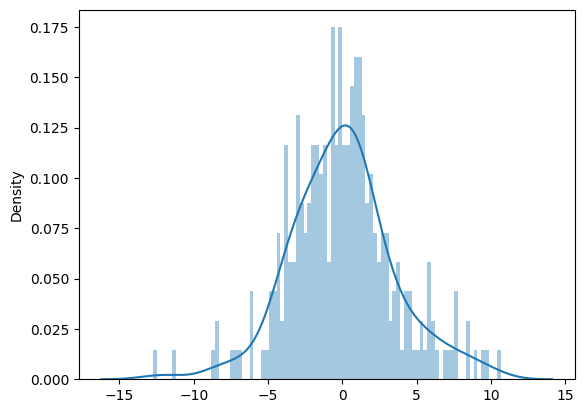

In [498]:
sns.distplot(models[selected_model].resid, bins=90,)
plt.show()

---
## Caso 2: Regresión logística con dataset 'Prostate'

In [500]:
prostate_df = prostate.load()
prostate_df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579819,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
1,-0.994252,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
2,-0.510826,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
3,-1.203973,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
4,0.751416,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.8764,68,-1.386294,1,1.32176,7,60,4.38515
93,3.821004,3.8969,44,-1.386294,1,2.16905,7,40,4.68444
94,2.907447,3.3962,52,-1.386294,1,2.46385,7,10,5.14312
95,2.882564,3.7739,68,1.558145,1,1.55814,7,80,5.47751


In [502]:
# Separamos las variables predictoras y el target
cols_predictors_prostate = ['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'gleason', 'pgg45']
target_prostate = 'svi'

# Separamos en el dataframe X e y
X_prostate = prostate_df[cols_predictors_prostate]
y_prostate = prostate_df[target_prostate]

In [503]:
X_prostate.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45
0,-0.579819,2.7695,50,-1.386294,-1.38629,6,0
1,-0.994252,3.3196,58,-1.386294,-1.38629,6,0
2,-0.510826,2.6912,74,-1.386294,-1.38629,7,20
3,-1.203973,3.2828,58,-1.386294,-1.38629,6,0
4,0.751416,3.4324,62,-1.386294,-1.38629,6,0


### 1. Obtenemos nuestro dataset de entrenamiento y de test en proporción 80:20

In [504]:
X_train_prostate, X_test_prostate, y_train_prostate, y_test_prostate = train_test_split(X_prostate, y_prostate, test_size=0.2, random_state=1)
df_train_prostate = pd.concat([X_train_prostate, y_train_prostate], axis=1)

X_train_prostate = X_train_prostate.reset_index().drop('index', axis=1)
X_test_prostate = X_test_prostate.reset_index().drop('index', axis=1)
y_train_prostate = y_train_prostate.reset_index().drop('index', axis=1)
y_test_prostate = y_test_prostate.reset_index().drop('index', axis=1)

X_train_prostate

,lcavol,lweight,age,lbph,lcp,gleason,pgg45
0,0.797507,3.0131,56,0.936093,-0.16252,7,5
1,0.182322,6.1076,65,1.704748,-1.38629,6,0
2,0.512824,3.6336,64,1.492904,0.04879,7,70
3,0.182322,3.8254,70,1.658228,-1.38629,6,0
4,2.532903,3.6776,61,1.348073,-1.38629,7,15
...,...,...,...,...,...,...,...
72,3.141131,3.2638,68,-0.051293,2.42037,7,50
73,0.223144,3.2445,63,-1.386294,-1.38629,6,0
74,1.214913,3.8254,69,-1.386294,0.22314,7,20
75,1.613430,3.0229,63,-1.386294,-0.59784,7,30


### 2. Análisis descriptivo de las variables de entrenamiento

Mostramos las variables predictoras en un boxplot para ver su distribución

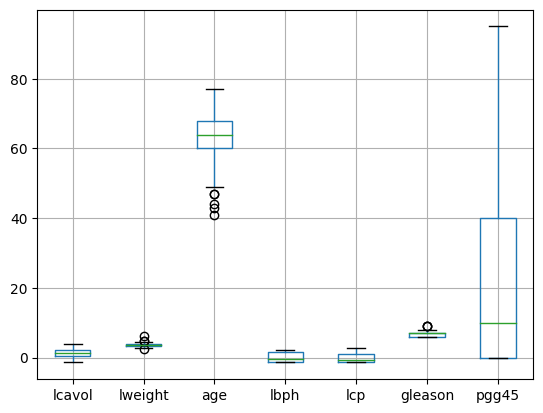

In [505]:
X_train_prostate.boxplot()
plt.show()

Debemos escalar las variables para poder mirarlas más adecuadamente en el gráfico

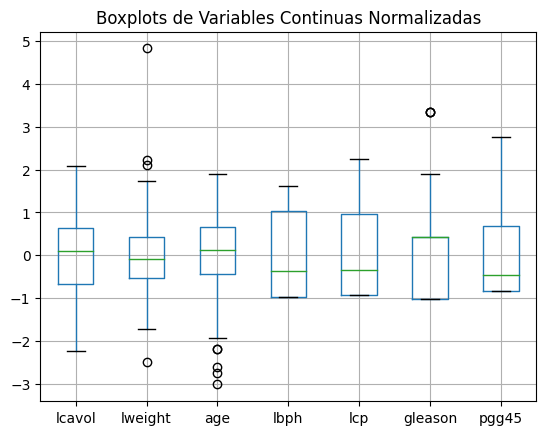

In [507]:
scaler_prostate = StandardScaler()
X_train_prostate_scaled = pd.DataFrame(scaler_prostate.fit_transform(X_train_prostate), columns=X_train_prostate.columns)

X_train_prostate_scaled.boxplot()
plt.title('Boxplots de Variables Continuas Normalizadas')
plt.show()

In [508]:
X_train_prostate

,lcavol,lweight,age,lbph,lcp,gleason,pgg45
0,0.797507,3.0131,56,0.936093,-0.16252,7,5
1,0.182322,6.1076,65,1.704748,-1.38629,6,0
2,0.512824,3.6336,64,1.492904,0.04879,7,70
3,0.182322,3.8254,70,1.658228,-1.38629,6,0
4,2.532903,3.6776,61,1.348073,-1.38629,7,15
...,...,...,...,...,...,...,...
72,3.141131,3.2638,68,-0.051293,2.42037,7,50
73,0.223144,3.2445,63,-1.386294,-1.38629,6,0
74,1.214913,3.8254,69,-1.386294,0.22314,7,20
75,1.613430,3.0229,63,-1.386294,-0.59784,7,30


In [509]:
X_train_prostate_scaled

,lcavol,lweight,age,lbph,lcp,gleason,pgg45
0,-0.438092,-1.234803,-0.971808,0.650907,-0.024429,0.436063,-0.644770
1,-0.951587,4.827383,0.254900,1.189682,-0.928626,-1.023800,-0.833543
2,-0.675717,-0.019231,0.118599,1.041194,0.131700,0.436063,1.809279
3,-0.951587,0.356509,0.936405,1.157075,-0.928626,-1.023800,-0.833543
4,1.010442,0.066965,-0.290303,0.939677,-0.928626,0.436063,-0.267224
...,...,...,...,...,...,...,...
72,1.518130,-0.743677,0.663803,-0.041184,1.883970,0.436063,1.054187
73,-0.917513,-0.781486,-0.017701,-0.976930,-0.928626,-1.023800,-0.833543
74,-0.089683,0.356509,0.800104,-0.976930,0.260521,0.436063,-0.078451
75,0.242959,-1.215605,-0.017701,-0.976930,-0.346070,0.436063,0.299095


##### Miramos una descripción de cada variable

In [511]:
X_train_prostate.describe()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1.322357,3.643417,63.129870,0.007463,-0.129457,6.701299,22.077922
std,1.205892,0.513807,7.384818,1.436026,1.362308,0.689488,26.660520
min,-1.347074,2.374900,41.000000,-1.386294,-1.386290,6.000000,0.000000
25%,0.512824,3.369000,60.000000,-1.386294,-1.386290,6.000000,0.000000
50%,1.442202,3.598700,64.000000,-0.527633,-0.597840,7.000000,10.000000
75%,2.073172,3.866000,68.000000,1.492904,1.178650,7.000000,40.000000
max,3.821004,6.107600,77.000000,2.326302,2.904170,9.000000,95.000000


Podemos ver que la variable `lbph` tiene un rango intercuartil mayor que las demás, sin embargo, si vemos sus valores máximos y mínimos, estos están mucho más cercanos a la media de los datos. Se puede ver que los valores de esta variable son los más homogéneos. También podemos decir que la distribución de estos datos se puede ver como una curva más delgada y condensada que otros. Por otra parte, en `gleason`, `lweight` y `age` podemos ver algunos outliers, es decir, ciertos datos que están fuera del rango intercuartil y que el boxplot refleja claramente.

#### Correlación entre predictores y target

In [512]:
df_train_prostate.corr().sort_values(target_prostate, ascending=False)[target_prostate]

svi        1.000000
lcp        0.658559
lcavol     0.583043
pgg45      0.407455
gleason    0.323532
lweight    0.125722
age        0.080200
lbph      -0.066107
Name: svi, dtype: float64

#### Orden de correlación (en valores absolutos)

1. **svi**
2. **lcp**
3. **lcavol**
4. **pgg45**
5. **gleason**
6. **lweight**
7. **lbph**
6. **age**

#### Gráfico de dispersión de cada variable

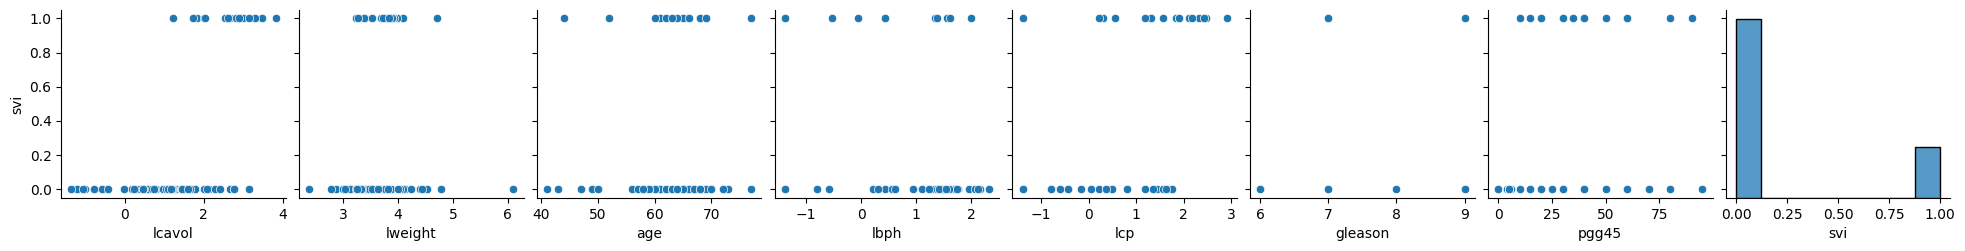

In [513]:
sns.pairplot(data=df_train_prostate, y_vars=target_prostate)
plt.show()

En este caso, dado que nuestro target es discreto y binario, el scatterplot no se torna muy descriptivo. Sin embargo, podemos ver que en las clases a predecir en `svi`, hay un claro desbalance de las clases. Esto es algo muy común en problemas de clasificación y, dado las características del problema, correspondería mirar ciertas métricas de clasificación más relevantes, según la distribución de las clases.

Vemos mas claramente la distribución del target

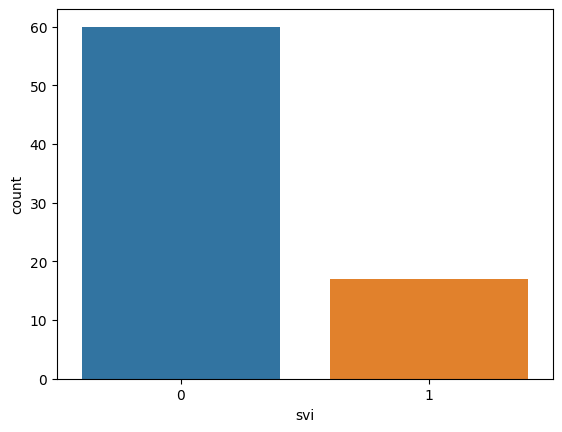

In [514]:
ax = sns.countplot(x=target_prostate, data=df_train_prostate)
plt.show()

### 3. Determinar modelo lineal con mejor desempeño

Para seleccionar variables, podemos utilizar un método stepwise similar al del problema anterior. Para este caso consideraremos entonces `backward elimination` de las formas similares a lo anterior. Por otra parte, también seleccionaremos combinaciones de las variables más correlacionadas como aquellas interesantes a incluir en el modelo.

##### Backward elimination Scikit-learn (seleccionamos 4 features de las 7)

In [516]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()

# Create the RFE object and specify the number of
selector_prostate = RFE(estimator, n_features_to_select=5)

# Fit the RFE object to the data
selector_prostate = selector_prostate.fit(X_train_prostate_scaled, y_train_prostate)

# Print the selected features
selected_vars_prostate_v1 = list(X_train_prostate_scaled.columns[selector_prostate.support_])
selected_vars_prostate_v1

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['lcavol', 'lweight', 'lcp', 'gleason', 'pgg45']

#### Backward elimination custom

In [518]:
def backwards_elimination_logit(X_train, y_train, columns_decoder):
    col_indexes_to_remove = list()

    num_vars = X_train.shape[1]
    for i in range(num_vars, 0, -1):
        # Fit model with i variables
        model = LogisticRegression()
        model.fit(X_train[:, :i], y_train)

        # Check p-values of the model
        p_values = f_regression(X_train, y_train)[1]
        max_p_value = np.max(p_values)

        # If the maximum p-value is greater than the threshold, remove the variable
        # with the highest p-value
        if max_p_value > 0.05:
            var_to_remove = np.argmax(p_values)
            col_indexes_to_remove.append(var_to_remove)
            X_train = np.delete(X_train, var_to_remove, 1)
    

    return [columns_decoder[i] for i in col_indexes_to_remove]


columns_X_train_prostate = X_train_prostate.columns.tolist()
column_decoder_prostate = dict(zip(range(len(columns_X_train_prostate)), columns_X_train_prostate))
columns_to_delete_prostate = backwards_elimination(X_train_prostate.values, y_train_prostate.values, column_decoder_prostate)
selected_vars_prostate_v2 = list(set(columns_X_train_prostate) - set(columns_to_delete_prostate))
selected_vars_prostate_v2

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

['gleason', 'pgg45', 'lcavol', 'lcp']

##### Generamos combinaciones de variables según correlación

In [520]:
var_combinations = {
    'selected_v1': selected_vars_prostate_v1,
    'selected_v2': selected_vars_prostate_v2,
    'corr_top1': ['lcp'],
    'corr_top2': ['lcp', 'lcavol'],
    'corr_top3': ['lcp', 'lcavol', 'pgg45'],
}
var_combinations

{'selected_v1': ['lcavol', 'lweight', 'lcp', 'gleason', 'pgg45'],
 'selected_v2': ['gleason', 'pgg45', 'lcavol', 'lcp'],
 'corr_top1': ['lcp'],
 'corr_top2': ['lcp', 'lcavol'],
 'corr_top3': ['lcp', 'lcavol', 'pgg45']}

#### Creamos funciones para generar la clasificación y evaluación de modelos

In [566]:
def fitted_clf(x, y):
    X = sm.add_constant(x)
    clf = sm.Logit(endog=y, exog=X)
    results = clf.fit()
    return results

def train_classifiers(X_train, y_train, vars):
    models = dict()
    for name, columns in vars.items():
        clf_fitted = fitted_clf(X_train[columns], y_train)
        models[name] = clf_fitted

    return models

def get_statistical_metrics_from_clf(model, X_train, y_train):
    metrics = dict()
    metrics['AIC'] = model.aic
    metrics['BIC'] = model.bic
    metrics['pseudo R2'] = model.prsquared
    metrics['p-value'] = model.pvalues[0]
    y_pred = model.predict(sm.add_constant(X_train))
    metrics['RMSE'] = eval_measures.rmse(y_train.squeeze(), y_pred)
    return metrics

#### Ejecutamos las clasificaciones y evaluación

In [557]:
models_prostate = train_classifiers(X_train_prostate_scaled, y_train_prostate, var_combinations)
models_prostate

Optimization terminated successfully.
         Current function value: 0.255980
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.256007
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297134
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.258970
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.258446
         Iterations 8


{'selected_v1': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x2ad3add10>,
 'selected_v2': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x2ae03b010>,
 'corr_top1': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x2ae03b4d0>,
 'corr_top2': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x2ae03be90>,
 'corr_top3': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x2ae03bf10>}

In [567]:
model_metrics_prostate = list()
for model_name, obj in models_prostate.items():
    X_model = X_train_prostate_scaled[var_combinations[model_name]]
    metrics = get_statistical_metrics_from_clf(obj, X_model, y_train_prostate)
    metrics['Model'] = f'Model {model_name}'
    model_metrics_prostate.append(metrics)


models_metrics_prostate_df = pd.DataFrame(model_metrics_prostate)
models_metrics_prostate_df

,AIC,BIC,pseudo R2,p-value,RMSE,Model
0,51.420930,65.483763,0.515090,0.000112,0.285166,Model selected_v1
1,49.425099,61.144126,0.515039,0.000108,0.285105,Model selected_v2
2,49.758661,54.446272,0.437131,0.000039,0.299626,Model corr_top1
3,45.881344,52.912760,0.509427,0.000087,0.288477,Model corr_top2
4,47.800733,57.175955,0.510419,0.000085,0.287310,Model corr_top3


Podemos ver que los 5 modelos generados tienen relevancia estadística, dado que tienen un p-value menor a 0.05.

#### Ordenamos los modelos por pseudo R2

In [568]:
models_metrics_prostate_df.sort_values('pseudo R2', ascending=False)

,AIC,BIC,pseudo R2,p-value,RMSE,Model
0,51.420930,65.483763,0.515090,0.000112,0.285166,Model selected_v1
1,49.425099,61.144126,0.515039,0.000108,0.285105,Model selected_v2
4,47.800733,57.175955,0.510419,0.000085,0.287310,Model corr_top3
3,45.881344,52.912760,0.509427,0.000087,0.288477,Model corr_top2
2,49.758661,54.446272,0.437131,0.000039,0.299626,Model corr_top1


Tenemos que el modelo `selected_v1` tiene el mayor pseudo coeficiente de determinación, siendo aquel el que explica la mayor varianza. Asimismo, el error cuadrático medio de este modelo no es el más bajo, sino el `selected_v2`. Igualmente, ambos RMSE son similares.

Ahora, por parsimonia, podemos mirar el modelo con menor AIC / BIC y elegirlo, dado que todos los modelos presentan R2 y RMSE muy similares.

In [569]:
models_metrics_prostate_df.sort_values('AIC')

,AIC,BIC,pseudo R2,p-value,RMSE,Model
3,45.881344,52.912760,0.509427,0.000087,0.288477,Model corr_top2
4,47.800733,57.175955,0.510419,0.000085,0.287310,Model corr_top3
1,49.425099,61.144126,0.515039,0.000108,0.285105,Model selected_v2
2,49.758661,54.446272,0.437131,0.000039,0.299626,Model corr_top1
0,51.420930,65.483763,0.515090,0.000112,0.285166,Model selected_v1


### Evaluación de métricas de la clasificación

Ahora observamos el poder predictivo de cada model. Para lo anterior, calculamos métricas de clasificación.

In [584]:
def get_clf_metrics(y_train, y_pred):
    metrics_clf = dict()
    metrics_clf['accuracy'] = accuracy_score(y_train, y_pred)
    metrics_clf['precision'] = precision_score(y_train, y_pred)
    metrics_clf['recall'] = recall_score(y_train, y_pred)
    metrics_clf['f1_score'] = f1_score(y_train, y_pred)
    metrics_clf['confusion_matrix'] = confusion_matrix(y_train, y_pred)
    return metrics_clf

In [588]:
metrics_clf_prostate = list()
for model_name, clf in models_prostate.items():
    features = var_combinations[model_name]
    y_pred_proba = clf.predict(sm.add_constant(X_train_prostate_scaled[features]))
    y_pred = (y_pred_proba >= 0.5).astype(int)
    metrics_clf = get_clf_metrics(y_train_prostate, y_pred)
    metrics_clf['Model name'] = model_name
    metrics_clf_prostate.append(metrics_clf)

metrics_clf_df = pd.DataFrame(metrics_clf_prostate)
metrics_clf_df

,accuracy,precision,recall,f1_score,confusion_matrix,Model name
0,0.883117,0.750000,0.705882,0.727273,"[[56, 4], [5, 12]]",selected_v1
1,0.883117,0.750000,0.705882,0.727273,"[[56, 4], [5, 12]]",selected_v2
2,0.844156,0.647059,0.647059,0.647059,"[[54, 6], [6, 11]]",corr_top1
3,0.896104,0.800000,0.705882,0.750000,"[[57, 3], [5, 12]]",corr_top2
4,0.883117,0.750000,0.705882,0.727273,"[[56, 4], [5, 12]]",corr_top3


Observando las clasificaciones, y dado que tenemos clases desbalanceadas, sería un buen approach observar el modelo que mejor predice la clase menos observada. En este caso, la clase 1. Dicho lo anterior, la mejor métrica a mirar es el `recall`, el cual mide la cantidad de casos positivos (clase 1) predichos vs la cantidad de casos positivos reales. Tomando la definición anterior ordenamos nuestro dataframe ordenadamente.

In [589]:
metrics_clf_df.sort_values('recall', ascending=False)

,accuracy,precision,recall,f1_score,confusion_matrix,Model name
0,0.883117,0.750000,0.705882,0.727273,"[[56, 4], [5, 12]]",selected_v1
1,0.883117,0.750000,0.705882,0.727273,"[[56, 4], [5, 12]]",selected_v2
3,0.896104,0.800000,0.705882,0.750000,"[[57, 3], [5, 12]]",corr_top2
4,0.883117,0.750000,0.705882,0.727273,"[[56, 4], [5, 12]]",corr_top3
2,0.844156,0.647059,0.647059,0.647059,"[[54, 6], [6, 11]]",corr_top1


Tenemos un empate entre el modelo `selected_v1` y `selected_v2`. Sin embargo, elegimos el modelo `corr_top2`, el cual tiene las variables `lcp` y `lcavol`, ya que estadísticamente es significativo y tiene un R2 mayor.

In [564]:
model_selected_prostate = 'corr_top2'
print(models_prostate[model_selected_prostate].summary())

                           Logit Regression Results                           
Dep. Variable:                    svi   No. Observations:                   77
Model:                          Logit   Df Residuals:                       74
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                  0.5094
Time:                        11:14:15   Log-Likelihood:                -19.941
converged:                       True   LL-Null:                       -40.648
Covariance Type:            nonrobust   LLR p-value:                 1.016e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7154      0.692     -3.925      0.000      -4.071      -1.359
lcp            1.1418      0.533      2.143      0.032       0.098       2.186
lcavol         1.8671      0.803      2.324      0.0

### 4. Significancia del modelo seleccionado

#### a. ¿Es el modelo significativo?

El modelo sí es significativo, teniendo un valor p de 0.000087. Se rechaza la hipótesis de mantener el modelo nulo, en contraposición con el modelo propuesto.

#### b. ¿Existe alguna covariable no significativa?

Las dos variables del modelo son significativas, teniendo un valor p menor a 0.05.

#### c. ¿En caso de existir alguna covariable no significativa, la quitaría del modelo? Fundamente.

El análisis que habría que realizar, en dicho caso, sería probar el modelo sin incorporar las covariables que no sean significativas, evaluar el valor p del modelo, su AIC / BIC, pseudo R2 y RMSE. En tal caso, si el modelo tiene un valor p menor a 0.05 ya lo podemos considerar. Asimismo con las otras variables. Por otro lado, también deberíamos evaluar sus métricas de desempeño enfocadas en la clasificación misma, referentes a la cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos positivos.

### 5. Significancia del modelo seleccionado